In [2]:
import numpy as np

In [6]:
class LinearRegression:


    def __init__(self, lr = 0.01, epochs = 1000, tol = 1e-12, batch_size = 64, seed = np.random.seed(42)) -> None:
        
        if lr <= 0:
            raise ValueError("learning rate must be positive")
        
        if epochs <= 0:
            raise ValueError("epoch must be positive")
        
        self.lr = lr
        self.tol = tol
        self.epochs = epochs
        self.loss = np.zeros(shape = (self.epochs, ))
        self.seed = seed
        self.batch_size = batch_size
    
    def batch_generator(self, X, y):

        num_samples, _ = X.shape
        indices = np.arange(num_samples)
        np.random.shuffle(indices)

        for start in np.arange(0, num_samples, self.batch_size):

            end = min(start + self.batch_size, num_samples)
            yield X[start : end], y[start : end]
        

    def fit(self, X, y) -> None:

        self.m, self.n = X.shape
        self.x = X
        self.y = y

        if self.y.ndim == 1:

            self.weights = np.random.uniform(-0.5, 0.5, size = (self.n, ))
            self.bias = np.random.uniform(-0.5, 0.5)
        
        else:

            self.weights = np.random.uniform(-0.5, 0.5, size = (self.n, 1))
            self.bias = np.random.uniform(-0.5, 0.5)
        
        
        for epoch in range(self.epochs):

            total_loss = 0
            

            for x_batch, y_batch in self.batch_generator(self.x, self.y):


                pred = self.predict(x_batch)
                batch_loss = np.mean(np.square(y_batch - pred))
                total_loss += batch_loss

                self.weights -= self.lr * (-2 / self.batch_size) * np.dot(x_batch.T, y_batch - pred)
                self.bias -= self.lr * (-2 / self.batch_size) * np.sum(y_batch - pred)

            self.loss[epoch] = total_loss / (self.m / self.batch_size)

            if epoch % 10 == 0:
                print(f"epoch {epoch}/{self.epochs} -- loss {self.loss[epoch]:.2f}")

            if epoch >= 1 and np.abs(self.loss[epoch] - self.loss[epoch - 1]) < self.tol:

                break
    

    def predict(self, X):

        return np.dot(X, self.weights) + self.bias

epoch 0/1000 -- loss 56.90
epoch 10/1000 -- loss 16.47
epoch 20/1000 -- loss 5.50
epoch 30/1000 -- loss 2.48
epoch 40/1000 -- loss 1.63
epoch 50/1000 -- loss 1.37
epoch 60/1000 -- loss 1.28
epoch 70/1000 -- loss 1.23
epoch 80/1000 -- loss 1.20
epoch 90/1000 -- loss 1.18
epoch 100/1000 -- loss 1.16
epoch 110/1000 -- loss 1.15
epoch 120/1000 -- loss 1.13
epoch 130/1000 -- loss 1.12
epoch 140/1000 -- loss 1.11
epoch 150/1000 -- loss 1.10
epoch 160/1000 -- loss 1.09
epoch 170/1000 -- loss 1.09
epoch 180/1000 -- loss 1.08
epoch 190/1000 -- loss 1.07
epoch 200/1000 -- loss 1.07
epoch 210/1000 -- loss 1.06
epoch 220/1000 -- loss 1.06
epoch 230/1000 -- loss 1.06
epoch 240/1000 -- loss 1.05
epoch 250/1000 -- loss 1.05
epoch 260/1000 -- loss 1.05
epoch 270/1000 -- loss 1.05
epoch 280/1000 -- loss 1.04
epoch 290/1000 -- loss 1.04
epoch 300/1000 -- loss 1.04
epoch 310/1000 -- loss 1.04
epoch 320/1000 -- loss 1.04
epoch 330/1000 -- loss 1.04
epoch 340/1000 -- loss 1.04
epoch 350/1000 -- loss 1.04
e

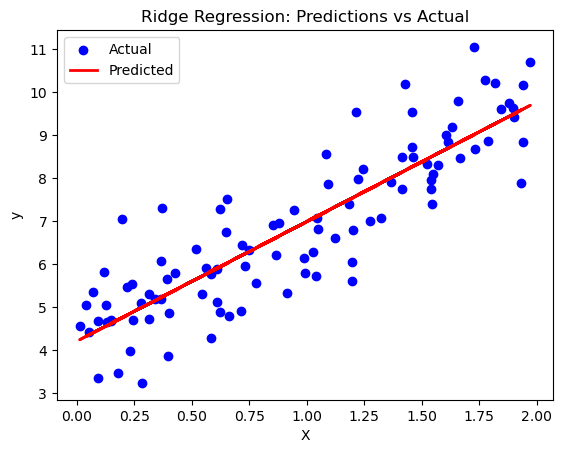

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset for testing
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(100)

# Instantiate the Ridge regression class
lr = LinearRegression(lr=0.01, epochs=1000)

# Fit the model on the entire dataset
lr.fit(X, y)

# Predict on the same dataset (using the same X for prediction)
y_pred = lr.predict(X)  # Adding bias term

# Print out the final training loss
print(f"Final training loss: {lr.loss[-1]:.4f}")

# Plot predictions vs actual
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge Regression: Predictions vs Actual")
plt.legend()
plt.show()
